In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [140]:
start = '2000-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [141]:
data.reset_index(inplace=True)

In [142]:
ma_100_days = data.Close.rolling(100).mean()

In [143]:
ma_200_days = data.Close.rolling(200).mean()

In [144]:
data.dropna(inplace=True)

In [145]:
data_train = pd.DataFrame(data[['Open', 'Close']][0: int(len(data)*0.80)])
data_test = pd.DataFrame(data[['Open', 'Close']][int(len(data)*0.80): len(data)])

In [146]:
data_train.shape

(3895, 2)

In [147]:
data_test.shape

(974, 2)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [149]:
data_train_scale = scaler.fit_transform(data_train)

In [236]:
data_train_scale.shape

(3895, 2)

In [239]:
trainx = []
trainy = []


for i in range(100, data_train_scale.shape[0]):
    trainx.append([data_train_scale[i-100:i][0], data_train_scale[i-100:i][1]])
    trainy.append(data_train_scale[i,1])
trainx = np.array(trainx)
trainy = np.array(trainy)

In [227]:
# #TEST 

# x = []
# y = []

# for i in range(100, len(data_train_scale)):
#     sequence = data_train_scale[i-100:i]
#     x.append(sequence[np.array([0, 1])])
#     y.append(data_train_scale[i, 1])

# x = np.array(x)
# y = np.array(y)

In [240]:
trainx.shape

(3795, 2, 2)

In [241]:
trainy.shape

(3795,)

In [242]:
# MOVING AVG ARRAY

for i in range(len(trainx)):
    print(trainx[i])
    print('\n')

[[0.00027938 0.00011442]
 [0.00062776 0.00287753]]


[[0.00062776 0.00287753]
 [0.00398733 0.00325541]]


[[0.00398733 0.00325541]
 [0.00415634 0.00168492]]


[[0.00415634 0.00168492]
 [0.00199021 0.00207667]]


[[0.00199021 0.00207667]
 [0.00198676 0.00273885]]


[[0.00198676 0.00273885]
 [0.00307327 0.00212867]]


[[0.00307327 0.00212867]
 [0.00210058 0.00069339]]


[[0.00210058 0.00069339]
 [0.00107272 0.00081819]]


[[1.07272007e-03 8.18191781e-04]
 [1.21068183e-03 8.32123562e-05]]


[[1.21068183e-03 8.32123562e-05]
 [0.00000000e+00 5.20035743e-04]]


[[0.         0.00052004]
 [0.00060707 0.        ]]


[[0.00060707 0.        ]
 [0.00062776 0.00054431]]


[[0.00062776 0.00054431]
 [0.00053463 0.00079393]]


[[0.00053463 0.00079393]
 [0.00115205 0.00079739]]


[[0.00115205 0.00079739]
 [0.00083127 0.00184439]]


[[0.00083127 0.00184439]
 [0.00256623 0.0025967 ]]


[[0.00256623 0.0025967 ]
 [0.00284908 0.00398   ]]


[[0.00284908 0.00398   ]
 [0.0039218  0.0041568 ]]


[[0.0039218  0

In [212]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [255]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Calculate moving averages for open and close prices


#x = x.reshape((x.shape[0], x.shape[1], 2))
# Build LSTM model
model = Sequential()
# add layers for both open and close prices
model.add(LSTM(50, return_sequences=True, input_shape=(trainx.shape[1], 2)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))


# compile model
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=50, batch_size=32)

# Make predictions
# Assuming you have test data prepared similarly
# predictions = model.predict(test_data)

# Remember to inverse transform the predictions if you scaled the data
# predictions = scaler.inverse_transform(predictions)

Epoch 1/50


2024-04-18 04:35:37.872382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-18 04:35:37.873364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-18 04:35:37.873860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: in user code:

    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_21' (type Sequential).
    
    Input 0 of layer "lstm_31" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2)
    
    Call arguments received by layer 'sequential_21' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
      • training=True
      • mask=None


In [245]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 2, 50)             10600     
                                                                 
 dropout_6 (Dropout)         (None, 2, 50)             0         
                                                                 
 lstm_30 (LSTM)              (None, 2, 50)             20200     
                                                                 
 dense_26 (Dense)            (None, 2, 25)             1275      
                                                                 
 dense_27 (Dense)            (None, 2, 25)             650       
                                                                 
 dense_28 (Dense)            (None, 2, 1)              26        
                                                                 
Total params: 32,751
Trainable params: 32,751
Non-tra

In [215]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale  =  scaler.fit_transform(data_test)

In [251]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    sequence = data_train_scale[i-100:i]
    x.append(sequence[np.array([0, 1])][0])
    y.append(data_train_scale[i, 1])

x = np.array(x)
y = np.array(y)


In [252]:
x.shape

(1074, 2)

In [253]:
y.shape

(1074,)

In [254]:
y_predict = model.predict(x)

ValueError: in user code:

    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ayushpathak/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_20' (type Sequential).
    
    Input 0 of layer "lstm_29" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2)
    
    Call arguments received by layer 'sequential_20' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
      • training=False
      • mask=None


In [222]:
print(1/scaler.scale_)

[99.03799438 97.87799835]


In [223]:
scale =1/scaler.scale_

In [224]:
y_predict = y_predict*scale

In [225]:
y_predict.shape 

(1074, 1, 2)

In [226]:
print(y_predict)

[[[1.00466087 0.99289364]]

 [[1.15111702 1.13763441]]

 [[1.31596952 1.30055605]]

 ...

 [[7.50693182 7.41900585]]

 [[7.10453132 7.02131853]]

 [[6.41566768 6.3405233 ]]]


In [188]:
y.shape

(974, 1)

In [189]:
scale.shape

(2,)

In [190]:
y = y*scale[0]

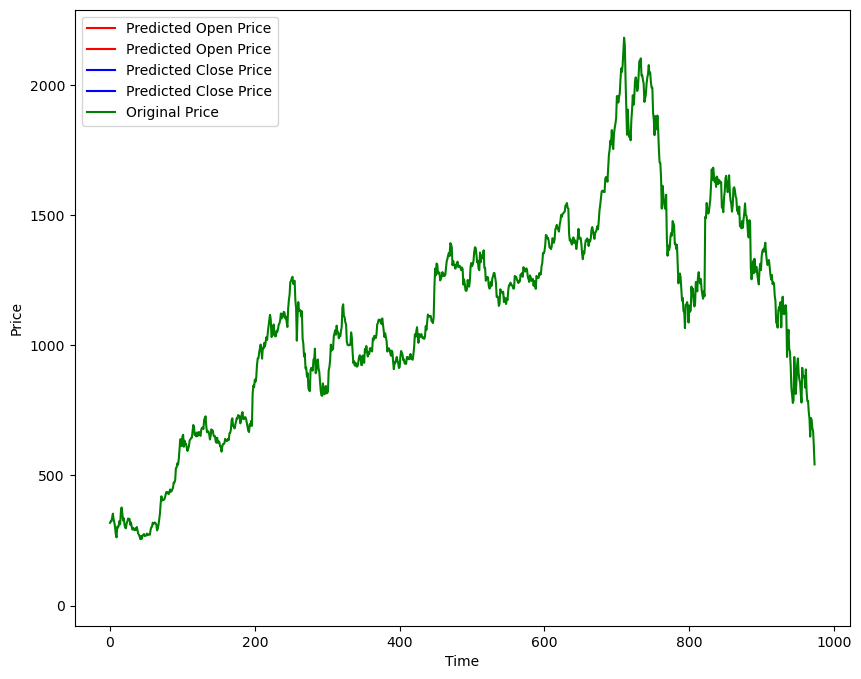

In [192]:
plt.figure(figsize=(10,8))
plt.plot(y_predict[0], 'r', label = 'Predicted Open Price')
plt.plot(y_predict[1], 'b', label = 'Predicted Close Price')

plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()